In [0]:
# imports the turbine number,year and month to predict
dbutils.widgets.text("Turbine", "4705")
dbutils.widgets.dropdown("Year", "2010", [str(x) for x in range(2000, 3000)])
dbutils.widgets.dropdown("Month", "6", [str(x) for x in range(1, 13)])

In [0]:
%pip install probflow==2.4.*
%pip install torch
%pip install seaborn==0.11.*

Python interpreter will be restarted.
Collecting probflow==2.4.*
 Using cached probflow-2.4.1-py3-none-any.whl (93 kB)
Requirement already satisfied: matplotlib>=3.1.0 in /databricks/python3/lib/python3.8/site-packages (from probflow==2.4.*) (3.2.2)
Requirement already satisfied: numpy>=1.17.0 in /databricks/python3/lib/python3.8/site-packages (from probflow==2.4.*) (1.19.2)
Collecting cloudpickle>=1.3
 Using cached cloudpickle-1.6.0-py3-none-any.whl (23 kB)
Requirement already satisfied: pandas>=0.25.0 in /databricks/python3/lib/python3.8/site-packages (from probflow==2.4.*) (1.1.3)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.8/site-packages (from matplotlib>=3.1.0->probflow==2.4.*) (0.10.0)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib>=3.1.0->probflow==2.4.*) (2.4.7)
Requirement already satisfied: python-dateutil>=2.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib>=3.1.0->probflow==2.4.*) (2.8.1)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib>=3.1.0->probflow==2.4.*) (1.3.0)
Requirement already satisfied: pytz>=2017.2 in /databricks/python3/lib/python3.8/site-packages (from pandas>=0.25.0->probflow==2.4.*) (2020.5)
Requirement already satisfied: six in /usr/local/lib/python3.8/site-packages (from cycler>=0.10->matplotlib>=3.1.0->probflow==2.4.*) (1.15.0)
Installing collected packages: cloudpickle, probflow
Successfully installed cloudpickle-1.6.0 probflow-2.4.1
WARNING: You are using pip version 20.2.4; however, version 21.2.4 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-4eed2a7c-955e-4d66-8212-3cbfaddf3ca0/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.
Python interpreter will be restarted.
Collecting torch
 Using cached torch-1.9.0-cp38-cp38-manylinux1_x86_64.whl (831.4 MB)
Collecting typing-extensions
 Using cached typing_extensions-3.10.0.2-py3-none-any.whl (26 kB)
Installing collected packages: typing-extensions, torch
Successfully installed torch-1.9.0 typing-extensions-3.10.0.2
WARNING: You are using pip version 20.2.4; however, version 21.2.4 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-4eed2a7c-955e-4d66-8212-3cbfaddf3ca0/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.
Python interpreter will be restarted.
Collecting seaborn==0.11.*
 Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
Requirement already satisfied: numpy>=1.15 in /databricks/python3/lib/python3.8/site-packages (from seaborn==0.11.*) (1.19.2)
Requirement already satisfied: matplotlib>=2.2 in /databricks/python3/lib/python3.8/site-packages (from seaborn==0.11.*) (3.2.2)
Requirement already satisfied: pandas>=0.23 in /databricks/python3/lib/python3.8/site-packages (from seaborn==0.11.*) (1.1.3)
Requirement already satisfied: scipy>=1.0 in /databricks/python3/lib/python3.8/site-packages (from seaborn==0.11.*) (1.5.2)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib>=2.2->seaborn==0.11.*) (1.3.0)
Requirement already satisfied: python-dateutil>=2.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib>=2.2->seaborn==0.11.*) (2.8.1)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib>=2.2->seaborn==0.11.*) (2.4.7)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.8/site-packages (from matplotlib>=2.2->seaborn==0.11.*) (0.10.0)
Requirement already satisfied: pytz>=2017.2 in /databricks/python3/lib/python3.8/site-packages (from pandas>=0.23->seaborn==0.11.*) (2020.5)
Requirement already satisfied: six>=1.5 in /usr/local/lib/python3.8/site-packages (from python-dateu

In [0]:
#Importing required packages
import numpy as np
import pandas as pd
import probflow as pf
import torch

In [0]:
%sql CREATE
OR REPLACE TEMPORARY VIEW asset_life_data_for_site AS
SELECT
  *
from
  asset_life_data
where
  YEAR(TIME_STAMP) = getArgument("Year")
  AND MONTH(TIME_STAMP) = getArgument("Month")
  AND TURBINE_SK_FK = getArgument("Turbine")

In [0]:
# turn table from spark sql to pandas dataframe
dfPandas = spark.sql("select * from asset_life_data_for_site").toPandas()

In [0]:
# display the data
'''display(dfPandas)
print(dfPandas.count())'''

TIME_STAMP,SITE_SK_FK,TURBINE_SK_FK,Amb_WindSpeed_Avg,Amb_WindSpeed_Max,Blds_BladeA_Load,Blds_BladeA_MaxLoad,Blds_BladeB_Load,Blds_BladeB_MaxLoad,Blds_BladeC_Load,Blds_BladeC_MaxLoad,Rtr_RPM_Avg,Rtr_RPM_Max,Gen_RPM_Avg,Gen_RPM_Max,Grd_Prod_Pwr_Avg,Grd_Prod_Pwr_Max,Blds_PitchAngle_Avg,Blds_PitchAngle_Std,TowerAcc_X_direction_StdXAcc,TowerAcc_X_direction_MaxXAcc,TowerAcc_Y_direction_StdYAcc,TowerAcc_Y_direction_MaxYAcc
2013-05-15T17:40:00.000+0000,272,4704,7.5,11.2,-4278412,-2506432,-3831872,-2096096,-3356702,-1594752,11.4,12.7,1287.6,1385.5,1142.8,1521.5,-1.8,0.1,53,188,46,228
2013-05-24T08:10:00.000+0000,272,4704,4.2,6.5,-1859014,-1145472,-1091366,-326256,-432094,309880,6.5,8.3,730.7,900.4,204.6,417.7,-1.7,0.1,23,76,22,95
2013-05-15T10:00:00.000+0000,272,4704,8.3,13.6,-5090788,-2638656,-4529080,-2096096,-4102349,-1485472,11.9,13.7,1348.9,1515.3,1447.4,2680.3,-2.2,0.5,79,311,86,394
2013-05-15T03:50:00.000+0000,272,4704,7.4,8.7,-4607061,-3393024,-4059325,-2887040,-3625765,-2406592,11.2,12.2,1273.3,1321.9,1123.3,1246.4,-1.8,0.0,31,97,26,84
2013-05-15T15:40:00.000+0000,272,4704,8.5,13.3,-5252069,-2319808,-4745490,-1947296,-4296901,-1462048,12.4,14.1,1405.7,1572.0,1793.9,3004.7,-2.0,0.8,72,313,84,381
2013-05-24T06:00:00.000+0000,272,4704,4.3,6.7,-1888986,-1122144,-1123165,-287104,-455131,380136,6.6,8.0,744.0,907.9,190.3,326.5,-1.7,0.2,18,79,25,79
2013-05-15T06:50:00.000+0000,272,4704,5.5,8.9,-2885285,-1752064,-2395089,-1305152,-1927428,-829776,8.3,10.2,942.4,1139.8,447.1,743.8,-1.8,0.1,56,212,45,177
2013-05-15T00:40:00.000+0000,272,4704,3.4,4.9,-1436576,-1231008,-985578,-772624,-576116,-369232,5.4,5.7,610.0,628.7,86.8,107.1,-1.5,0.2,12,22,5,5
2013-05-15T16:50:00.000+0000,272,4704,8.3,12.2,-5001875,-2996416,-4517220,-2675584,-4054991,-2102144,12.3,13.8,1391.8,1534.6,1543.0,3002.2,-2.0,0.3,62,329,68,358
2013-05-24T02:20:00.000+0000,272,4704,6.1,9.3,-3405401,-1962048,-2619090,-1156352,-1896808,-455096,9.4,12.5,1066.4,1396.0,745.3,1255.2,-1.8,0.2,72,257,54,212


TIME_STAMP 4456
SITE_SK_FK 4456
TURBINE_SK_FK 4456
Amb_WindSpeed_Avg 4455
Amb_WindSpeed_Max 4455
Blds_BladeA_Load 4456
Blds_BladeA_MaxLoad 4456
Blds_BladeB_Load 4456
Blds_BladeB_MaxLoad 4456
Blds_BladeC_Load 4456
Blds_BladeC_MaxLoad 4456
Rtr_RPM_Avg 4455
Rtr_RPM_Max 4455
Gen_RPM_Avg 4455
Gen_RPM_Max 4455
Grd_Prod_Pwr_Avg 4455
Grd_Prod_Pwr_Max 4455
Blds_PitchAngle_Avg 4455
Blds_PitchAngle_Std 4455
TowerAcc_X_direction_StdXAcc 4456
TowerAcc_X_direction_MaxXAcc 4456
TowerAcc_Y_direction_StdYAcc 4456
TowerAcc_Y_direction_MaxYAcc 4456
dtype: int64

In [0]:
# Plotting
'''import matplotlib.pyplot as plt

def plotDataframe(df):
  fig, (ax,ax1,ax2,ax3,ax4,ax5) = plt.subplots(6,1,figsize=(5,15))
  ax.scatter(df['Amb_WindSpeed_Avg'],df['Grd_Prod_Pwr_Avg'])
  ax.grid()
  ax1.scatter(df['Amb_WindSpeed_Avg'],df['Blds_BladeA_Load'])
  ax1.grid()
  ax2.scatter(df['Amb_WindSpeed_Avg'],df['TowerAcc_X_direction_StdXAcc'])
  ax2.grid()
  ax3.scatter(df['Amb_WindSpeed_Avg'],df['TowerAcc_Y_direction_StdYAcc'])
  ax3.grid()
  ax4.scatter(df['Amb_WindSpeed_Avg'],df['Blds_PitchAngle_Avg'])
  ax4.grid()
  ax5.scatter(df['Amb_WindSpeed_Avg'],df['Gen_RPM_Avg'])
  ax5.grid()
  plt.show()'''

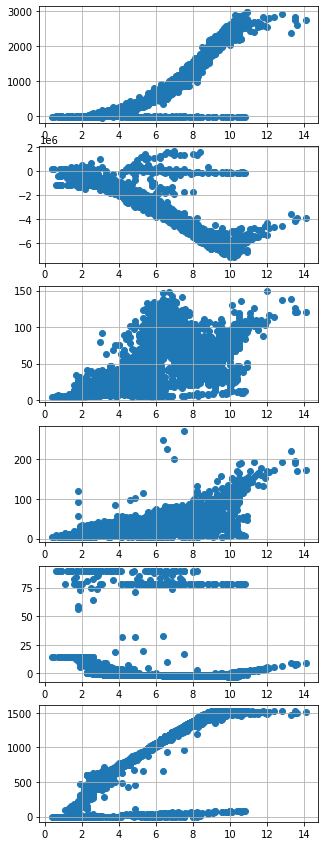

In [0]:
# plotDataframe(dfPandas)

In [0]:


def filter_data(df):
  # Dropping the rows which are not a numbers i.e NaN
  df =df.dropna()
  df = df.set_index(np.arange(0,len(df.index),1))
  #creating the windspeed bins for filtering 
  bin_max = 25 #np.max(df['Amb_WindSpeed_Avg'])
  #creating a bin for every 0.5m/s 
  wspdbin = np.arange(0,bin_max,0.5)
  
  df['spdbins'] = pd.cut(df['Amb_WindSpeed_Avg'],bins=wspdbin)


  #Calculating the mean and standarddeviation of the windspeed and power
  kw_mean = pd.DataFrame(data = (df.groupby('spdbins')['Grd_Prod_Pwr_Avg'].mean())).dropna()
  Ns_mean = (pd.DataFrame(data =df.groupby('spdbins')['Amb_WindSpeed_Avg'].mean())).dropna().to_numpy()
  kw_mad = pd.DataFrame(data =df.groupby('spdbins')['Grd_Prod_Pwr_Avg'].std()).dropna()

  #Calculating the max and the min ranges of the curve to be interpolated.
  kw_min = (kw_mean - kw_mad).to_numpy()
  kw_max = (kw_mean + kw_mad).to_numpy()
  
  #filtering the dataset based on the below listed columns
  columns = ['Grd_Prod_Pwr_Avg','Amb_WindSpeed_Avg','Blds_PitchAngle_Avg','Blds_BladeA_Load','Gen_RPM_Avg','Rtr_RPM_Avg']
  index = df.index
  X=[]
  #Checking conditions for each row
  for x in range(len(index)):
    #filtering for start and stops & curtailment by putting the linear interpolation to the power curve  
    if  df.loc[x,columns[0]] < (np.interp(df.loc[x,columns[1]],Ns_mean.transpose()[-1],kw_min.transpose()[-1],left = 0, right =np.mean(kw_max) )):#Min permitted value
      X.append(x)
    elif df.loc[x,columns[0]] > (np.interp(df.loc[x,columns[1]],Ns_mean.transpose()[-1],kw_max.transpose()[-1],left = 0, right =np.mean(kw_max) )): #Max permitted value
      X.append(x)
    elif (df.loc[x,columns[2]] > 20)  |  ((df.loc[x,columns[1]] < 7)  & (df.loc[x,columns[2]] > 0)) :
      X.append(x) 
    elif (df.loc[x,columns[3]] < -6500000) |(df.loc[x,columns[4]] <600):
      X.append(x)
    elif (df.loc[x,columns[1]] > 10) & (df.loc[x,columns[4]] < 1350)| (df.loc[x,columns[1]] > 10) & (df.loc[x,columns[5]] < 12.4):
          X.append(x)
    else:
      pass
    
  filtered = df.drop(X)
  
  return filtered

In [0]:
# Here we correct the data and scale according to the training dataset
def correct_data(df):
  # Tower accelerations & loads has to cobverted to different scales
  Acc = ["TowerAcc_X_direction_StdXAcc","TowerAcc_X_direction_MaxXAcc" ,"TowerAcc_Y_direction_StdYAcc", "TowerAcc_Y_direction_MaxYAcc"]
  
  loads = ["Blds_BladeA_Load","Blds_BladeA_MaxLoad",	"Blds_BladeB_Load",	"Blds_BladeB_MaxLoad"	,"Blds_BladeC_Load"	,"Blds_BladeC_MaxLoad"]
  
  # Converting acceleration in m/s to mm/s
  df[Acc] = df[Acc]/1000
  #Converting loads and inverting the graph according to the training dataset
  df[loads] = df[loads]/-1000
  
  
  return df

  

In [0]:
#Call the function to correct data 
features = correct_data(filter_data(dfPandas))

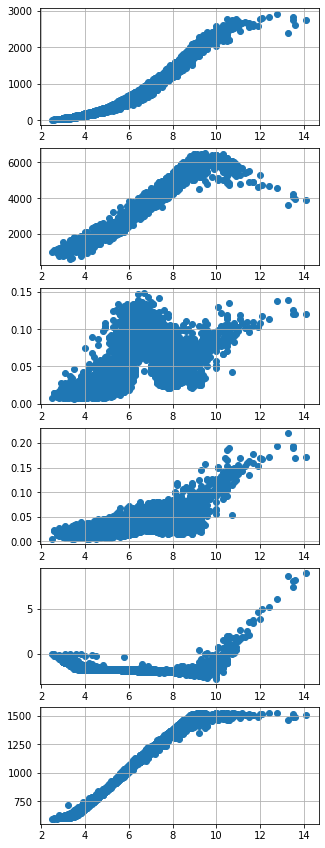

In [0]:
# plotDataframe(features)

In [0]:
def woehler_sum(x, m):
    return (np.sum(x**m))**(1/m)

In [0]:
#Input features from the SCADA signals
X_headers = ["Blds_BladeA_Load",
             "Blds_BladeB_Load",
             "Blds_BladeC_Load",
             "Amb_WindSpeed_Avg",
             "Rtr_RPM_Avg",
             "Gen_RPM_Avg",
             "Grd_Prod_Pwr_Avg",
             "TowerAcc_X_direction_StdXAcc",
             "TowerAcc_Y_direction_StdYAcc",
             "Blds_BladeA_MaxLoad",
             "Blds_BladeB_MaxLoad",
             "Blds_BladeC_MaxLoad",
             "Amb_WindSpeed_Max",
             "Rtr_RPM_Max",
             "Gen_RPM_Max",
             "Grd_Prod_Pwr_Max",
             "TowerAcc_X_direction_MaxXAcc",
             "TowerAcc_Y_direction_MaxYAcc"]

# Output values predicted
Y_headers =["MZTB_del_m4","MYTB_del_m4","MZTM_del_m4","MYTM_del_m4","MZTT_del_m4","MYTT_del_m4"]

In [0]:
# Setting backend as pytorch
pf.set_backend('pytorch')

#setting random generator as 42 for both pytorch and numpy
seed = 42
np.random.seed(seed)

torch.manual_seed(seed)
pf.set_datatype(torch.float32)

#Loading the trained model weights
model_path = "/dbfs/FileStore/asset_life/trained_11_08_2021.pfm"
Model = pf.load(model_path)

In [0]:

from sklearn.preprocessing import StandardScaler

#loading the train dataset
trained_data_path = "/dbfs/FileStore/asset_life/v112_neustadt_dosse_10min.csv"

x_scaler = StandardScaler()
y_scaler = StandardScaler()

test_df = pd.read_csv(trained_data_path)
test_df = test_df[Y_headers].to_numpy(dtype = np.float32)
test_df_scaled = y_scaler.fit_transform(test_df)

In [0]:
#Standardization of the SCADA signals
scada_data = features[X_headers].to_numpy(dtype = np.float32) #Loading and features and converting into numpy
scaled_scada_data = x_scaler.fit_transform(scada_data) #Standardising

In [0]:
#Predict output
y_pred = Model.predict(scaled_scada_data)
y_pred = y_scaler.inverse_transform(y_pred) #Inverse scaling back again

In [0]:
#Loading results to dataframe
results_mxtb, results_mytb, results_mxtm = pd.DataFrame(data = y_pred[ :,[0]],columns=["pred"]),pd.DataFrame(data = y_pred[ :,[1]],columns=["pred"]),pd.DataFrame(data = y_pred[ :,[2]],columns=["pred"])

results_mytm, results_mxtt, results_mytt = pd.DataFrame(data = y_pred[ :,[3]],columns=["pred"]),pd.DataFrame(data = y_pred[ :,[4]],columns=["pred"]),pd.DataFrame(data = y_pred[ :,[5]],columns=["pred"])

results_mxtb['X'], results_mytb['X'], results_mxtm['X'], results_mytm['X'], results_mxtt['X'], results_mytt['X'] = scada_data[:,[7]],scada_data[:,[8]],scada_data[:,[7]],scada_data[:,[8]],scada_data[:,[7]],scada_data[:,[8]]

In [0]:
lwr, upr = Model.predictive_interval(scaled_scada_data, n=100, ci = 0.75, batch_size=1000) 
lwr = y_scaler.inverse_transform(lwr)
upr = y_scaler.inverse_transform(upr)

results_mxtb['lwr'], results_mytb['lwr'], results_mxtm['lwr'] = lwr[ :,[0]],lwr[ :,[1]],lwr[ :,[2]]
results_mytm['lwr'], results_mxtt['lwr'], results_mytt['lwr'] = lwr[ :,[3]],lwr[ :,[4]],lwr[ :,[5]]
results_mxtb['upr'], results_mytb['upr'], results_mxtm['upr'] = upr[ :,[0]],upr[ :,[1]],upr[ :,[2]]
results_mytm['upr'], results_mxtt['upr'], results_mytt['upr'] = upr[ :,[3]],upr[ :,[4]],upr[ :,[5]]

In [0]:
'''def plot_results(results, ax, title):    
    ax.scatter(results['X'], results['pred'], color='red', label='predicted', linewidth=.001)
    ax.fill_between(results['X'], results['lwr'], results['upr'], label='uncertainity', alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('NacAccSTD')
    ax.set_ylabel('DEL')
    ax.legend();'''

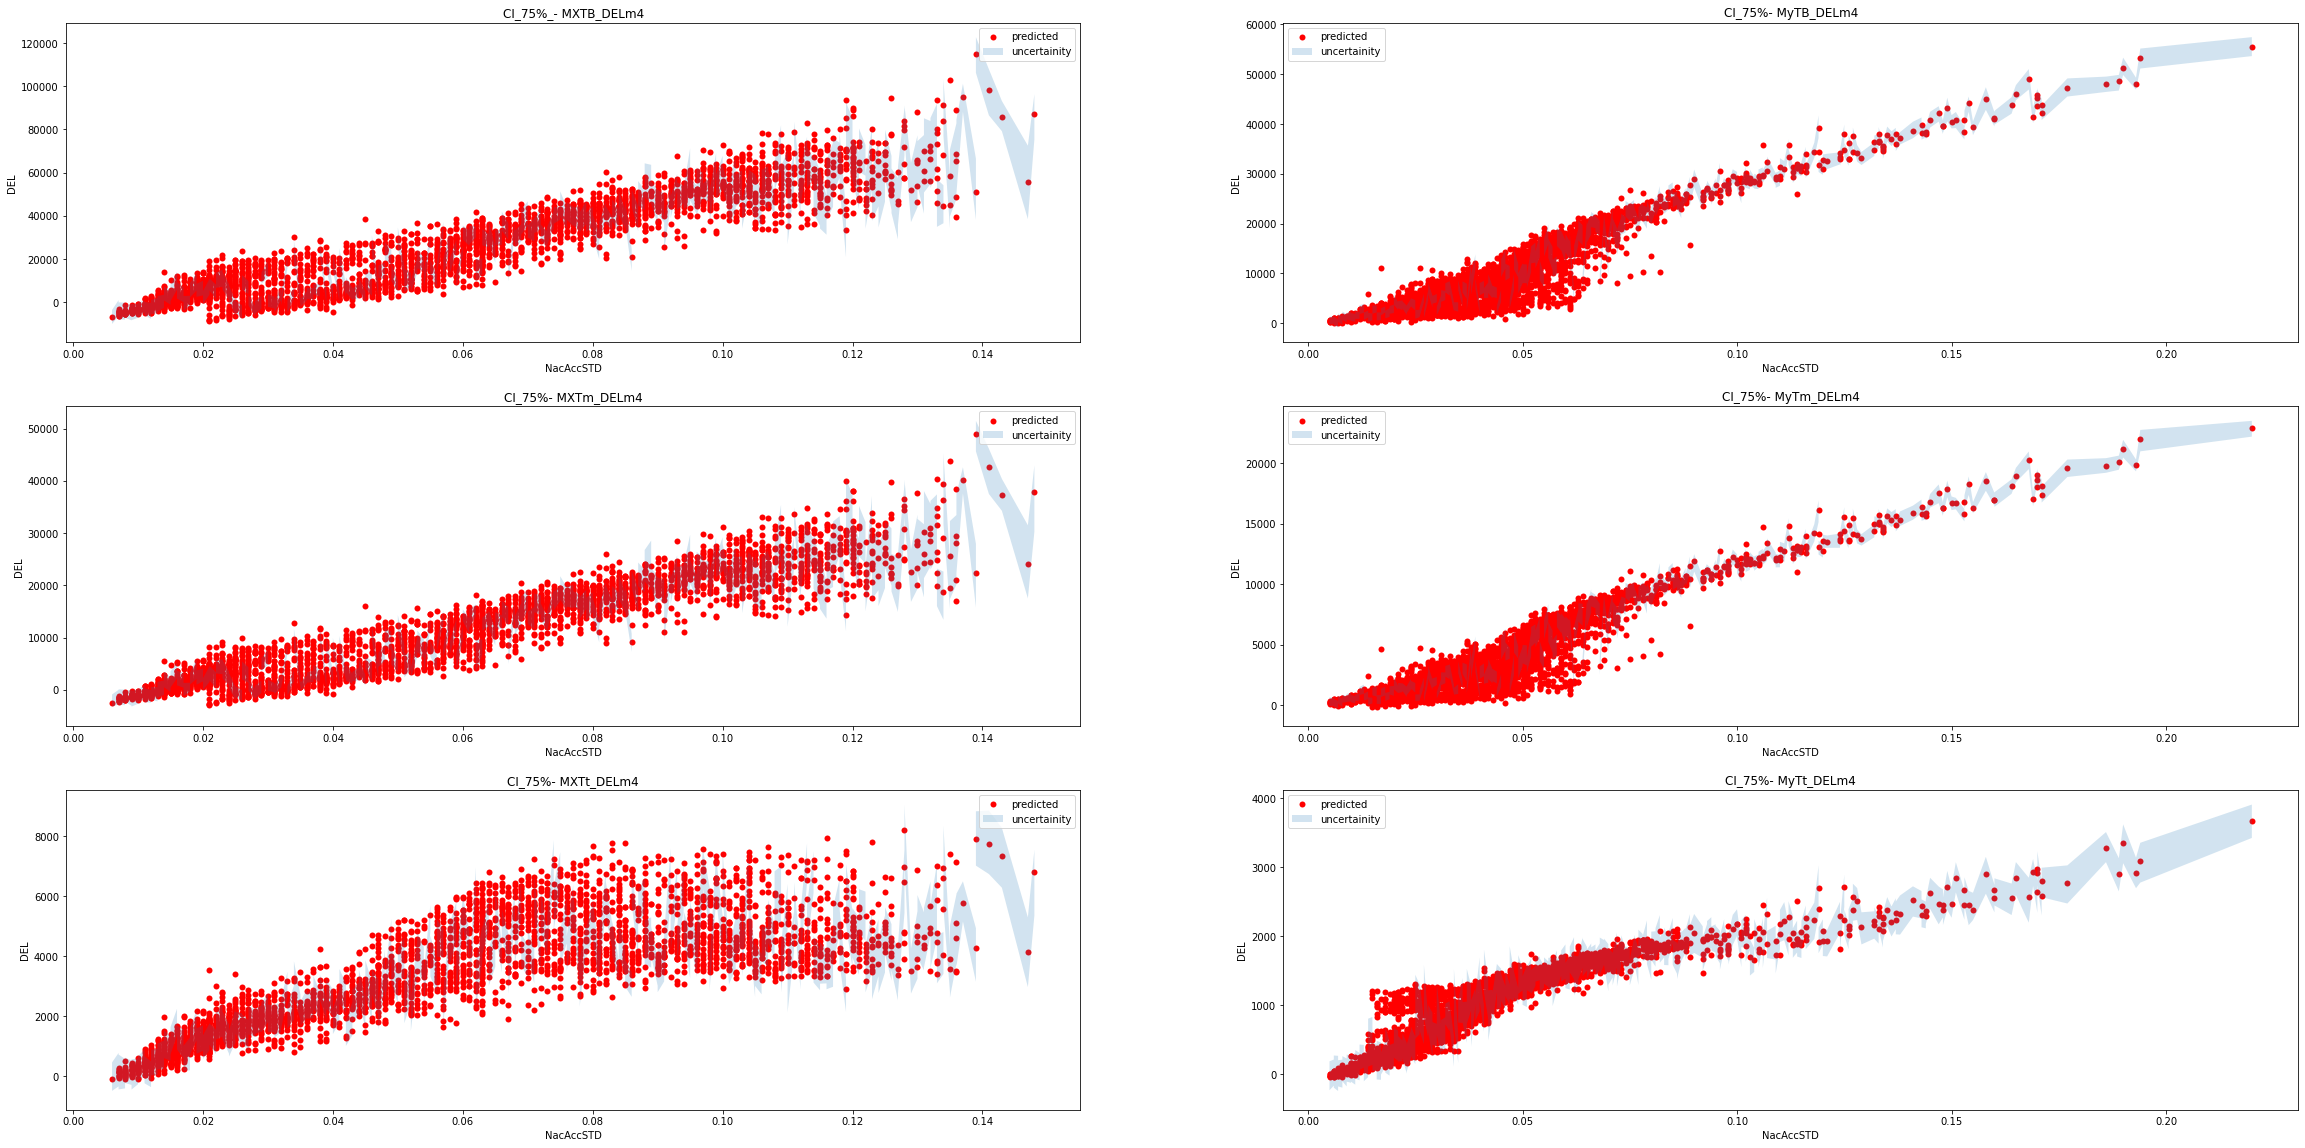

In [0]:
'''mxtb = results_mxtb.sort_values(by='X')
mytb = results_mytb.sort_values(by='X')
mxtm = results_mxtm.sort_values(by='X')
mytm = results_mytm.sort_values(by='X')
mxtt = results_mxtt.sort_values(by='X')
mytt = results_mytt.sort_values(by='X')

fig, ax = plt.subplots(3,2,figsize=(40,20))
plot_results(mxtb,ax[0,0],title='CI_75%_- MXTB_DELm4')
plot_results(mytb,ax[0,1],title='CI_75%- MyTB_DELm4')
plot_results(mxtm,ax[1,0],title='CI_75%- MXTm_DELm4')
plot_results(mytm,ax[1,1],title='CI_75%- MyTm_DELm4')
plot_results(mxtt,ax[2,0],title='CI_75%- MXTt_DELm4')
plot_results(mytt,ax[2,1],title='CI_75%- MyTt_DELm4')'''

In [0]:
# Taking samples from the posterior distribution
num_samples = 1000

samples = Model.predictive_sample(scaled_scada_data, n=num_samples,batch_size=1000)
samples = y_scaler.inverse_transform(samples)

In [0]:
#Calculate the accumulated loads by applying woehler sum
accumulated_loads = np.apply_along_axis(woehler_sum, 1, samples, m=4)

In [0]:
import seaborn as sns

def plot_loads(samples, title):
    ax = sns.boxplot(x=samples) 
    ax.set_title(title)
    ax.set_xlabel('Accumulated_DEL')
    ax.grid()
    plt.show()

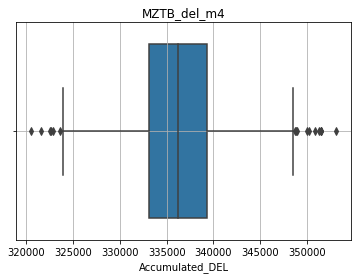

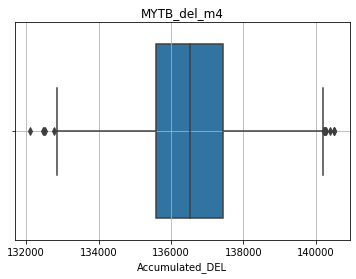

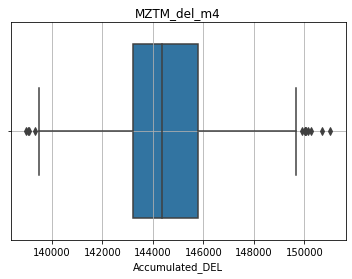

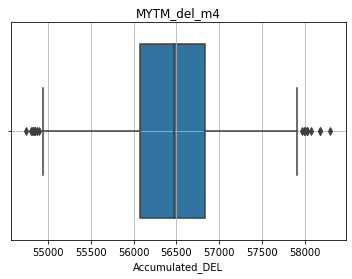

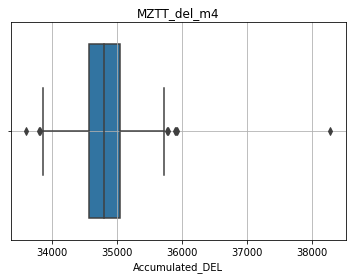

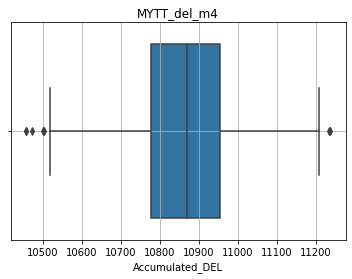

In [0]:
num_predicted_quantities = np.size(Y_headers)

for i_quant in range(num_predicted_quantities):
    samples_quant = accumulated_loads[:, i_quant]
    title = Y_headers[i_quant]
    plot_loads(samples_quant, title)

In [0]:
viewName = f'loads_{dbutils.widgets.get("Turbine")}_{dbutils.widgets.get("Year")}_{dbutils.widgets.get("Month")}'

df = pd.DataFrame(accumulated_loads, columns=Y_headers)
sparkDF = spark.createDataFrame(df).createOrReplaceGlobalTempView(viewName)

dbutils.notebook.exit(viewName)

loads_4704_2013_5